# <font color="red">Scikit-learn</font>

## <font color="blue">Définition</font>

Scikit-learn (sklearn) est une librairie de python utilisée pour le machine learning. Elle est construite sous forme d'une multitude de classes pour chaque modèle de machine learning existants. 

Ex: model = LinearRegression(....)

## <font color="blue">Utilisation</font>

L'avantage de sklearn est que quelque soit le modèle choisi, les étapes de machine learning ne change pas et peuvent être réalisées de la manière suivante :
* Régression linéaire
    * model = LinearRegression()
    * model.fit(X,y)
    * model.score(X,y)
    * model.predict(X)
* Decision Tree
    * model = DecisionTreeClassifier()
    * model.fit(X,y)
    * model.score(X,y)
    * model.predict(X)

=> choix du modéle, entraînement (fit), évaluation (score) puis prédiction (predict)

## <font color="blue">Modules</font>

Il existe de nombreux modules dans sklearn possédant eux-mêmes les classes des modèles à utiliser :
* sklearn.linear_model : LinearRegression, Ridge, Lasso, SGDRegressor
* sklearn.neighbors : KNeighborsClassifier
* sklearn.svm : SVC, SVR
* ...

<img src="ml_map.png">

### <font color="green">Regression linéaires</font>

In [86]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [87]:
np.random.seed(0)
m = 100 #nombre de données
X = np.linspace(0,10,m).reshape(m,1)
y = X + np.random.randn(m,1)

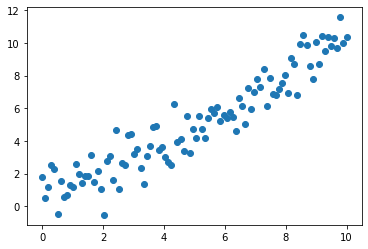

In [88]:
plt.scatter(X,y)

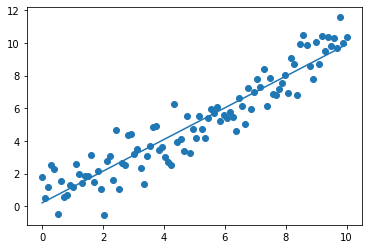

In [89]:
model = LinearRegression()
model.fit(X,y)
model.score(X,y) #Return R²
predictions = model.predict(X)

plt.scatter(X,y)
plt.plot(X, predictions)

### <font color="green">KNN</font>

In [90]:
import pandas as pd  
import seaborn as sns

In [91]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [92]:
titanic = titanic[["survived","pclass","sex","age"]] #sélection des colonnes qui nous interesse
titanic.dropna(axis=0, inplace=True) #retirer les individus avec des valeurs manquantes
titanic["sex"].replace(["male","female"], [0, 1], inplace=True) #remplacer les sex par 0 ou 1
titanic.head()

,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


In [93]:
from sklearn.neighbors import KNeighborsClassifier

In [94]:
model = KNeighborsClassifier()
y = titanic["survived"]
X = titanic.drop("survived", axis=1)

In [95]:
model.fit(X,y)
model.score(X,y)

0.8417366946778712

In [96]:
def survived(model, pclass=3, sex=1, age=29):
    x = np.array([pclass,sex,age]).reshape(1,3)
    print(model.predict(x))
    print(model.predict_proba(x))

survived(model)

[0]
[[0.6 0.4]]


C:\Users\boure\anaconda3\envs\rudy_datascience\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\boure\anaconda3\envs\rudy_datascience\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [97]:
def neighbors(n_neighbors):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X,y)
    print(model.score(X,y))

neighbors(1)
neighbors(2)
neighbors(3)
neighbors(4)
neighbors(5)

0.8739495798319328
0.84593837535014
0.8627450980392157
0.8403361344537815
0.8417366946778712


## <font color="blue">Train Test Split</font>

On divise en deux nos données afin d'éviter d'estimer un score de notre modèle sur des individus déjà introduits dans notre modéle (**fit**)

=> (X_train,y_train) : 80 % du dataset et (X_test,y_test) : 20% du dataset

In [98]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [99]:
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)  
model.fit(X_train,y_train)  
model.score(X_test,y_test)  

1.0

Attention, lorsque l'on régle les hyperparamètres d'un modèle pour améliorer le score sur le test set, cela revient au même que de passer le test set en train set.  
=> utilisation d'un validation set

## <font color="blue">Cross Validation</font>

<img src="cross_validation.png">

Plusieurs méthodes différentes de cross-validation :
* KFold
* StratifiedKFold
* ShuffleSplit

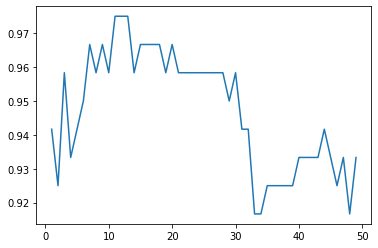

In [100]:
from sklearn.model_selection import cross_val_score

val_score = []
for i in range(1, 50):
    score = cross_val_score(KNeighborsClassifier(i), X_train, y_train, cv=5).mean()
    val_score.append(score)
plt.plot(np.arange(1,50), val_score)

## <font color="blue">Validation Curve</font>

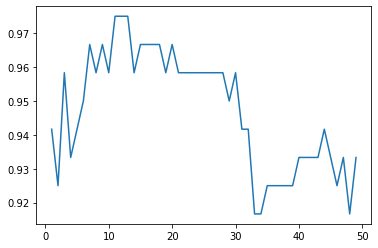

In [101]:
from sklearn.model_selection import validation_curve

model = KNeighborsClassifier()
k = np.arange(1, 50)

train_score, val_score = validation_curve(model, X_train, y_train, param_name="n_neighbors",param_range=k, cv=5)

plt.plot(k, val_score.mean(axis=1))

Possibilité également de tracer le train_score ce qui est très utile pour mettre en évidence **l'overfitting**. Si train_score >>>> val_score alors overfitting.

## <font color="blue">GridSearchCV</font>

Permet de trouver facilement les hyperparamètres d'un modéle.

In [102]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors' : np.arange(1,20), 'metric': ["manhattan", "euclidean"]}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

grid.fit(X_train, y_train)

print(grid.best_params_)
model = grid.best_estimator_
model.score(X_test,y_test)

{'metric': 'manhattan', 'n_neighbors': 14}


0.9666666666666667

## <font color="blue">Matrice de confusion</font>

Permet d'évaluer la qualité d'un modéle de classification en montrant les erreurs de classement.

In [103]:
from sklearn.metrics import confusion_matrix

In [104]:
confusion_matrix(y_test, model.predict(X_test))

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

## <font color="blue"> Learning curve </font>

Permet de déterminer à partir de quelle quantité de données notre modéle n'évoluera plus en terme de performance.

In [105]:
from sklearn.model_selection import learning_curve

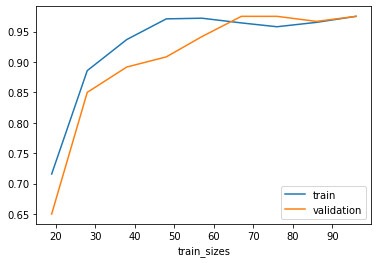

In [107]:
N, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.2, 1, 9), cv=5)

plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()